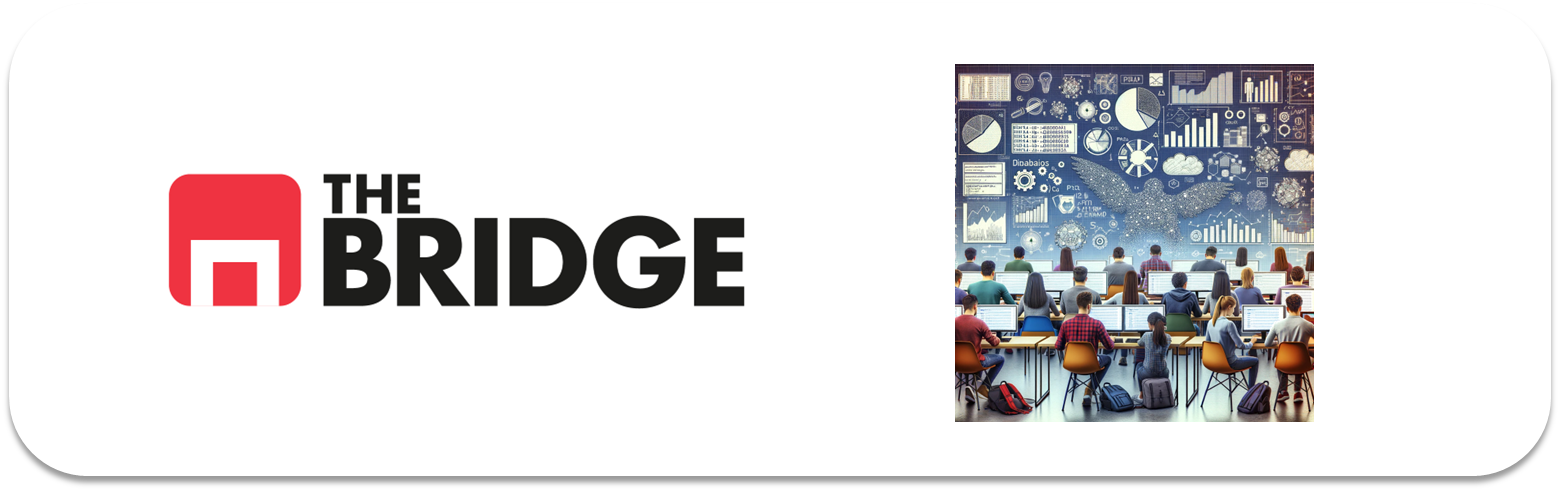

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



---
---
# 1. Data Accquisition
---
---

### 1.1 imports for project

In [1]:
import numpy as np
import pandas as pd
import dstoolbox as tlbx

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from scipy import stats
from scipy.special import inv_boxcox

from sklearn import metrics
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

---
### 1.2 load dataset

In [2]:
boston_data_raw = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep="|")

---
### 1.3 Initial impression of dataset

In [3]:
boston_data_raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


***Key characteristics:***
- 506 entries
- 12 features
- all numerical variables
- no null values

---
---
# 2. Data Processing
---
---

### 2.1 Define target and features

In [5]:
# define features and target
features = boston_data_raw.columns.to_list()
target = pd.DataFrame(boston_data_raw['MEDV'])

In [6]:
# remove target from features
features.remove('MEDV')

---
### 2.2 Check Target Distribution

Check for reasonably normal distribution so that linear regression model is a valid option

MEDV Skewness: 1.1081
MEDV Excess Kurtosis: -1.5048


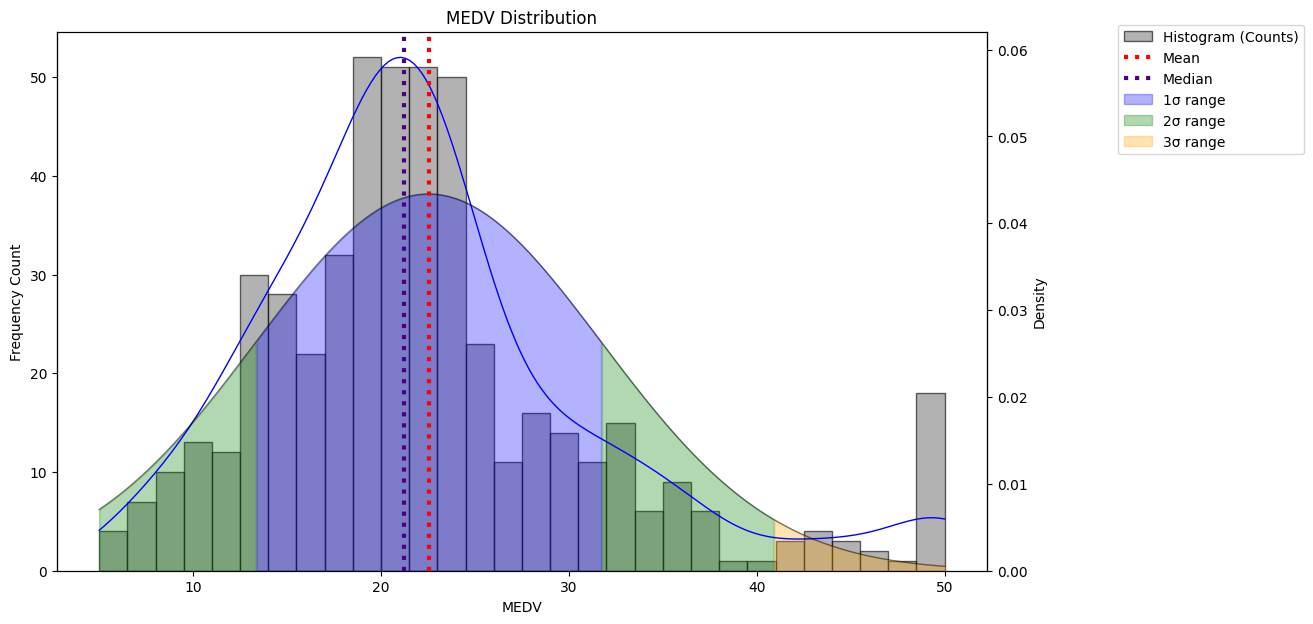

In [7]:
# Visual analysis of target distribution
tlbx.plot_histogram_kde_with_std(boston_data_raw, 'MEDV', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [8]:
boxprops = {'facecolor':colors.to_rgba('blue', 0.5),
            'edgecolor':colors.to_rgba('black', 1),
            'linewidth':0.4,
            'linestyle':'-',
            'zorder':1
            }

whiskerprops = {'color':'black',
               'linewidth':0.6,
               'linestyle':'-',
               'alpha':1,
               'solid_capstyle':None, #(butt, round, projecting)}
               'zorder': 1
               }

capprops = {'color':'black',
               'linewidth':0.6,
               'linestyle':'-',
               'alpha':1,
               'solid_capstyle':None, #(butt, round, projecting)}
               'zorder': 1
               }

medianprops = {'color':'red',
               'linewidth':1.5,
               'linestyle':'--',
               'alpha':1,
               'zorder': 2
               }

flierprops = {'marker':'x', 
              'markersize':5,
              'markerfacecolor':colors.to_rgba('blue', 1),
              'markeredgecolor':colors.to_rgba('blue', 1),
              'markeredgewidth':0.6,
              'zorder':2
              }


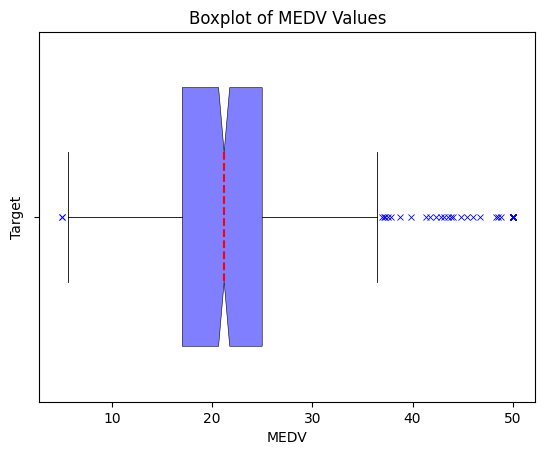

In [9]:
ax = sns.boxplot(boston_data_raw['MEDV'], 
                 notch=True, 
                 orient='h',
                 width=0.7,
                 boxprops=boxprops,
                 whiskerprops=whiskerprops,
                 capprops=capprops,
                 medianprops=medianprops,
                 flierprops=flierprops
                 )

ax.set_ylabel('Target')
ax.set_title(f'Boxplot of MEDV Values')
plt.show()

In [10]:
# Statistical analysis of target distribution
stat, p_value = stats.shapiro(boston_data_raw['MEDV'])

print("Shapiro-Wilk Test:")
print('Statistic:', stat)
print('P-value:', p_value)
print()
print("Statistical Evaluation:")
if p_value < 0.05:
    print("As p-value is < 0.05:\n  Reject null hypothesis.\n  Not enough evidence to suggest data is normally distributed")
else:
    print(f"As p-value is $\\geq$ 0.05:\n  Fail to reject the null hypothesis.\n  Sufficient evidence to suggest data may be normally distributed")

Shapiro-Wilk Test:
Statistic: 0.9171758803890093
P-value: 4.941386258635722e-16

Statistical Evaluation:
As p-value is < 0.05:
  Reject null hypothesis.
  Not enough evidence to suggest data is normally distributed


### 2.2.1 Target Distribution Evaluation
***Visually:***
- relatively large group of extreme high values
- likely causing the kurtosis value
- slightly right skewed
    - possibly try some transformation to get better model fit
        - log
        - Box-Cox
        - Yeo-Johnson

---
### 2.2.2 Target variable transformations

In [11]:
# Apply log transformation to target variable
target['log_MEDV'] = np.log(target['MEDV'])


# Apply boxcox transformation to target variable
target['MEDV_boxcox'], lambda_boxcox = stats.boxcox(target['MEDV'])

# Apply Yeo-Johnson transformation to target
pt = PowerTransformer(method='yeo-johnson')
target['MEDV_YEOJO'] = pt.fit_transform(target[['MEDV']])

---
### 2.2.3 Evaluate target transformations

##### Log_MEDV evaluation

log_MEDV Skewness: -0.3303
log_MEDV Excess Kurtosis: -2.1926


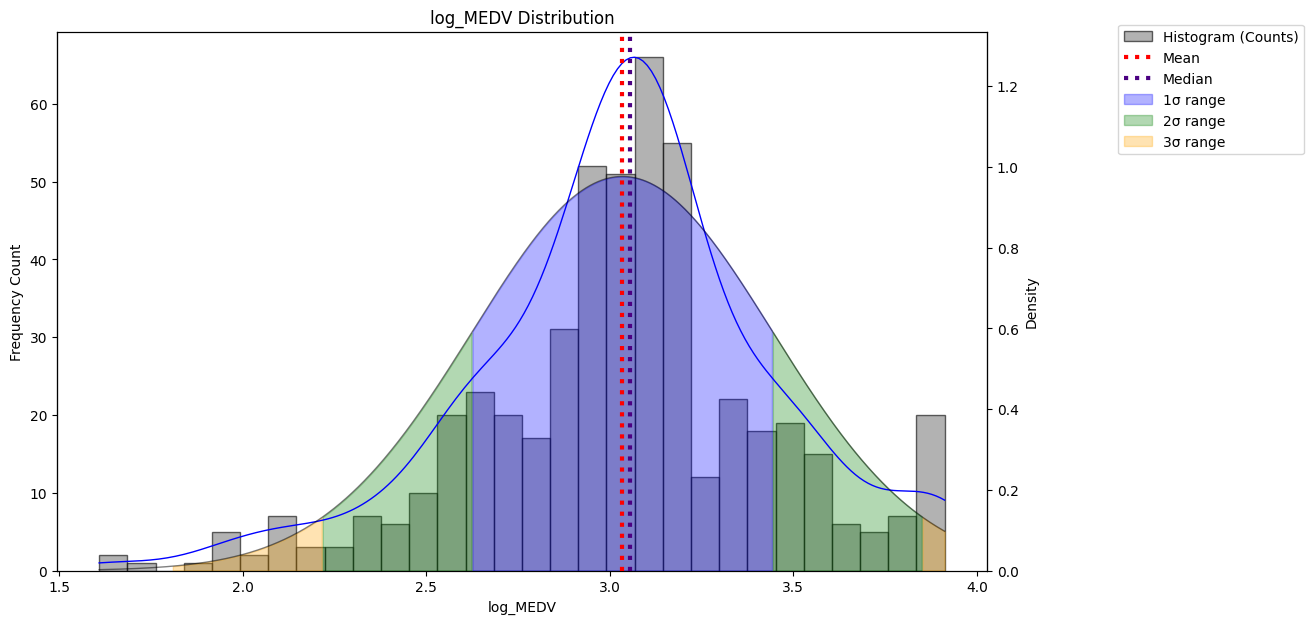

In [12]:
# Visualise distributions
tlbx.plot_histogram_kde_with_std(target, 'log_MEDV', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [13]:
# Statistical evaluation of log_MEDV distribution
stat, p_value = stats.shapiro(target['log_MEDV'])

print("Shapiro-Wilk Test:")
print('Statistic:', stat)
print('P-value:', p_value)
print()
print("Statistical Evaluation:")
if p_value < 0.05:
    print("As p-value is < 0.05:\n  Reject null hypothesis.\n  Not enough evidence to suggest data is normally distributed")
else:
    print(f"As p-value is $\\geq$ 0.05:\n  Fail to reject the null hypothesis.\n  Sufficient evidence to suggest data may be normally distributed")

Shapiro-Wilk Test:
Statistic: 0.9757386401202984
P-value: 1.9354268611078725e-07

Statistical Evaluation:
As p-value is < 0.05:
  Reject null hypothesis.
  Not enough evidence to suggest data is normally distributed


---
##### boxcox_MEDV evaluation

MEDV_boxcox Skewness: 0.0159
MEDV_boxcox Excess Kurtosis: -2.4635


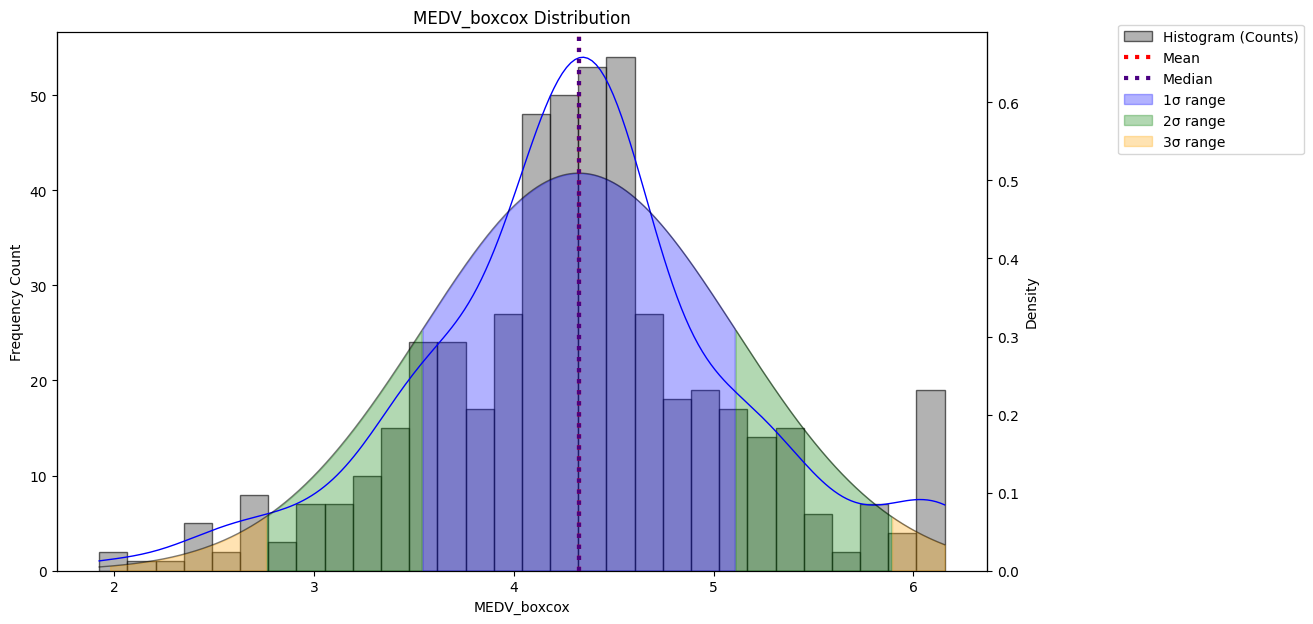

In [14]:
# visualise distirbution
tlbx.plot_histogram_kde_with_std(target, 'MEDV_boxcox', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

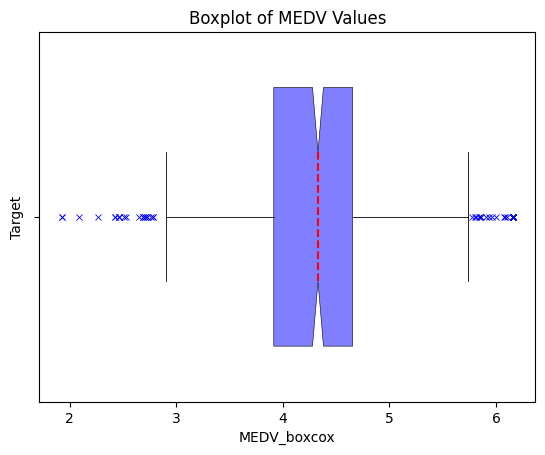

In [15]:
ax = sns.boxplot(target['MEDV_boxcox'], 
                 notch=True, 
                 orient='h',
                 width=0.7,
                 boxprops=boxprops,
                 whiskerprops=whiskerprops,
                 capprops=capprops,
                 medianprops=medianprops,
                 flierprops=flierprops
                 )

ax.set_ylabel('Target')
ax.set_title(f'Boxplot of MEDV Values')
plt.show()

- Shifted outliers to both ends of the distribution.
- Improves symmetry

In [16]:
# Statistical evaluation of boxcox_MEDV distribution
stat, p_value = stats.shapiro(target['MEDV_boxcox'])

print("Shapiro-Wilk Test:")
print('Statistic:', stat)
print('P-value:', p_value)
print()
print("Statistical Evaluation:")
if p_value < 0.05:
    print("As p-value is < 0.05:\n  Reject null hypothesis.\n  Not enough evidence to suggest data is normally distributed")

Shapiro-Wilk Test:
Statistic: 0.98002847012561
P-value: 2.0404640680917056e-06

Statistical Evaluation:
As p-value is < 0.05:
  Reject null hypothesis.
  Not enough evidence to suggest data is normally distributed


---
##### MEDV_YEOJO transformation

MEDV_YEOJO Skewness: 0.0112
MEDV_YEOJO Excess Kurtosis: -2.4875


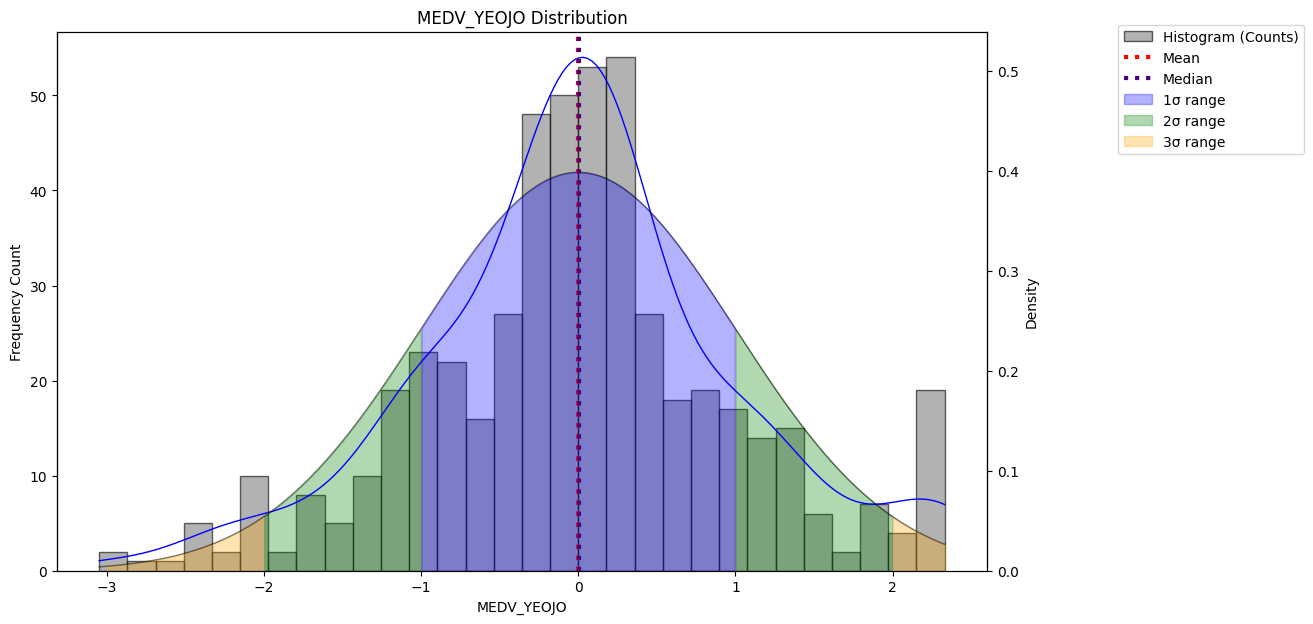

In [17]:
# visualise distirbution
tlbx.plot_histogram_kde_with_std(target, 'MEDV_YEOJO', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

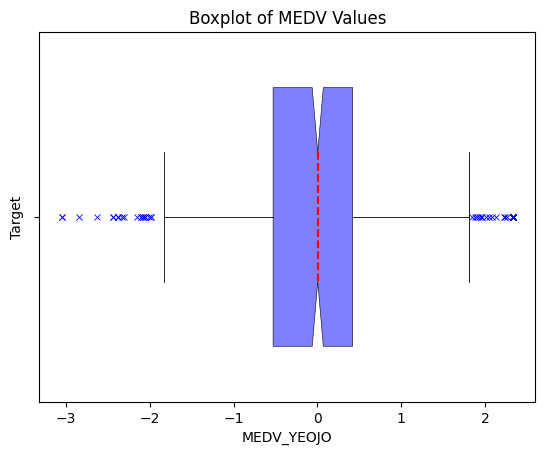

In [18]:
ax = sns.boxplot(target['MEDV_YEOJO'], 
                 notch=True, 
                 orient='h',
                 width=0.7,
                 boxprops=boxprops,
                 whiskerprops=whiskerprops,
                 capprops=capprops,
                 medianprops=medianprops,
                 flierprops=flierprops
                 )

ax.set_ylabel('Target')
ax.set_title(f'Boxplot of MEDV Values')
plt.show()

In [19]:
# Statistical evaluation of boxcox_MEDV distribution
stat, p_value = stats.shapiro(target['MEDV_YEOJO'])

print("Shapiro-Wilk Test:")
print('Statistic:', stat)
print('P-value:', p_value)
print()
print("Statistical Evaluation:")
if p_value < 0.05:
    print("As p-value is < 0.05:\n  Reject null hypothesis.\n  Not enough evidence to suggest data is normally distributed")

Shapiro-Wilk Test:
Statistic: 0.980422530779598
P-value: 2.5663763248227534e-06

Statistical Evaluation:
As p-value is < 0.05:
  Reject null hypothesis.
  Not enough evidence to suggest data is normally distributed


---
##### 2.2.4 Transformations analysis

***Improving symmetry (Skewness):***
- log_MEDV transformation reduces skewness and improves symmetry of the data.
- log_MEDV pushed distribution slightly left
- boxcox_MEDV transformation further reduced skewness and provides the most symmetrical distribution
- Yeo-Johnson transformation further reduced skewness

***Tail losses (Kurtosis):***  
- excess kurtosis = kurtosis - 3
- normal distribution excess kurtosis = 0
- both log and boxcox transformations moved excess kurtosis more negative
- make the tails thinner and further away from a normal tail distribution.
    - implication: less likely to emphasise extreme values
- Yeo-Johnson thinned out the tails even more.

***Transformation Selcetion:***
- MEDV with no transformation
- boxcox_MEDV as showed improved symmetry.
- Yeo-Johnson showed improved symmetry on top of boxcox but tail thinning even more pronounced. See what effect this tail thinning has.

---
### 2.4 Data Splitting

In [20]:
# split data into X_train, X-test, y_train, y_test. 20% in test
from sklearn.model_selection import train_test_split

X = boston_data_raw[features]
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
---
# 3. EDA of Train Features
---
---

### 3.1 Descriptive overview

In [21]:
# overview of quick stats
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.563482,11.803218,10.916188,0.064356,0.556383,6.282458,68.191832,3.828435,9.586634,409.448020,18.429950,12.672203
std,8.249837,24.060259,6.768473,0.245691,0.119108,0.690633,28.378399,2.159439,8.774536,167.040001,2.177751,7.160232
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,1.920000
25%,0.079340,0.000000,4.945000,0.000000,0.448000,5.888750,43.625000,2.097050,4.000000,280.750000,17.000000,7.137500
50%,0.245415,0.000000,9.125000,0.000000,0.538000,6.189000,77.150000,3.199200,5.000000,336.000000,19.000000,11.430000
75%,3.731923,12.500000,18.100000,0.000000,0.647000,6.632000,93.900000,5.287300,24.000000,666.000000,20.200000,16.672500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000


- probably going to want to use StandardScaler further down the line...

---
### 3.2 Distributions

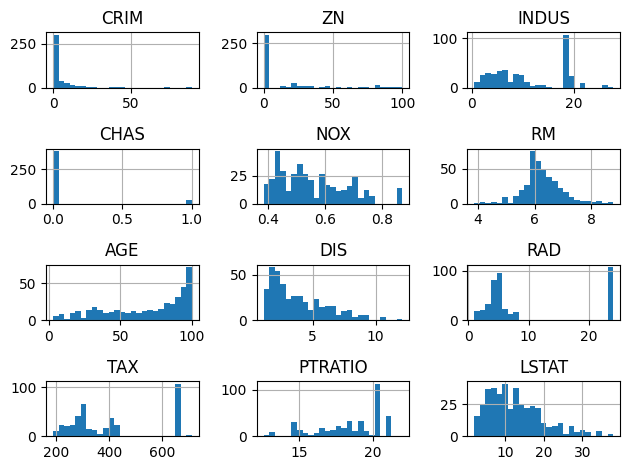

In [22]:
# visualise each features distribution
X_train.hist(bins=25)
plt.tight_layout()

In [23]:
X_train.CHAS.value_counts()

0.0    378
1.0     26
Name: CHAS, dtype: int64

Looks like quite a lot of transformation can be done to the features.  

***Initial Ideas:***
NOX: 
    Bins --> 3 cats 0, 0.5, 0.8  

RM: 
    Looks quite normal. Leave it alone?  

Age: 
    Not normal at all. Very left skewed. not sure what to do with it  

DIS: 
    right skewed. COuld try boxcox or log?  

RAD: 
    strange. investigate high peak. Possibly split into two categories.  

TAX: 
    Bin into 3?  

PTRATIO: 
    See if theres any correlation. delete?  

LSTAT: 
    right skewed. could be another good candidate for log, boxcox or yeo-jo transformation

---
### 3.3 Correlation with target

In [24]:
# Create individual Series of correlation between each of the targets (MEDV and transformations) with each feature
MEDV_corr_coef = X_train.corrwith(y_train['MEDV'], numeric_only=True)
log_MEDV_corr_coef = X_train.corrwith(y_train['log_MEDV'], numeric_only=True)
MEDV_boxcox_corr_coef = X_train.corrwith(y_train['MEDV_boxcox'], numeric_only=True)
MEDV_YEOJO_corr_coef = X_train.corrwith(y_train['MEDV_YEOJO'], numeric_only=True)

# Create a dataframe for quick easy checking of correlation feature by feature
# Just to help me to understand how the transformations might affect correlations
corr_coefs = pd.DataFrame({
    'MEDV': MEDV_corr_coef,
    'log_MEDV': log_MEDV_corr_coef,
    'MEDV_boxcox': MEDV_boxcox_corr_coef,
    'MEDV_YEOJO': MEDV_YEOJO_corr_coef},
    index=(X_train.columns))

In [25]:
MEDV_corr_coef.sort_values(ascending=True)

LSTAT     -0.738416
PTRATIO   -0.491670
INDUS     -0.479430
TAX       -0.451454
NOX       -0.421551
CRIM      -0.392390
RAD       -0.378413
AGE       -0.372965
CHAS       0.175817
DIS        0.259507
ZN         0.371796
RM         0.675928
dtype: float64

In [26]:
log_MEDV_corr_coef.sort_values(ascending=True)

LSTAT     -0.811085
TAX       -0.549427
INDUS     -0.537634
CRIM      -0.533753
NOX       -0.505481
PTRATIO   -0.498094
RAD       -0.493334
AGE       -0.449976
CHAS       0.152299
DIS        0.350052
ZN         0.374766
RM         0.619487
dtype: float64

log transformation increased (or decreased depending how its thought about) correlation coefficient for anything negatively correlated with target MEDV.

In [27]:
MEDV_boxcox_corr_coef.sort_values(ascending=True)

LSTAT     -0.802046
TAX       -0.533019
INDUS     -0.531170
CRIM      -0.504551
PTRATIO   -0.502060
NOX       -0.492641
RAD       -0.472071
AGE       -0.438727
CHAS       0.157912
DIS        0.334029
ZN         0.378908
RM         0.638082
dtype: float64

In [28]:
MEDV_YEOJO_corr_coef.sort_values(ascending=True)

LSTAT     -0.802587
TAX       -0.533855
INDUS     -0.531970
CRIM      -0.504981
PTRATIO   -0.502345
NOX       -0.493572
RAD       -0.472896
AGE       -0.439715
CHAS       0.157597
DIS        0.334899
ZN         0.379253
RM         0.637819
dtype: float64

---
### 3.4 Correlations between features

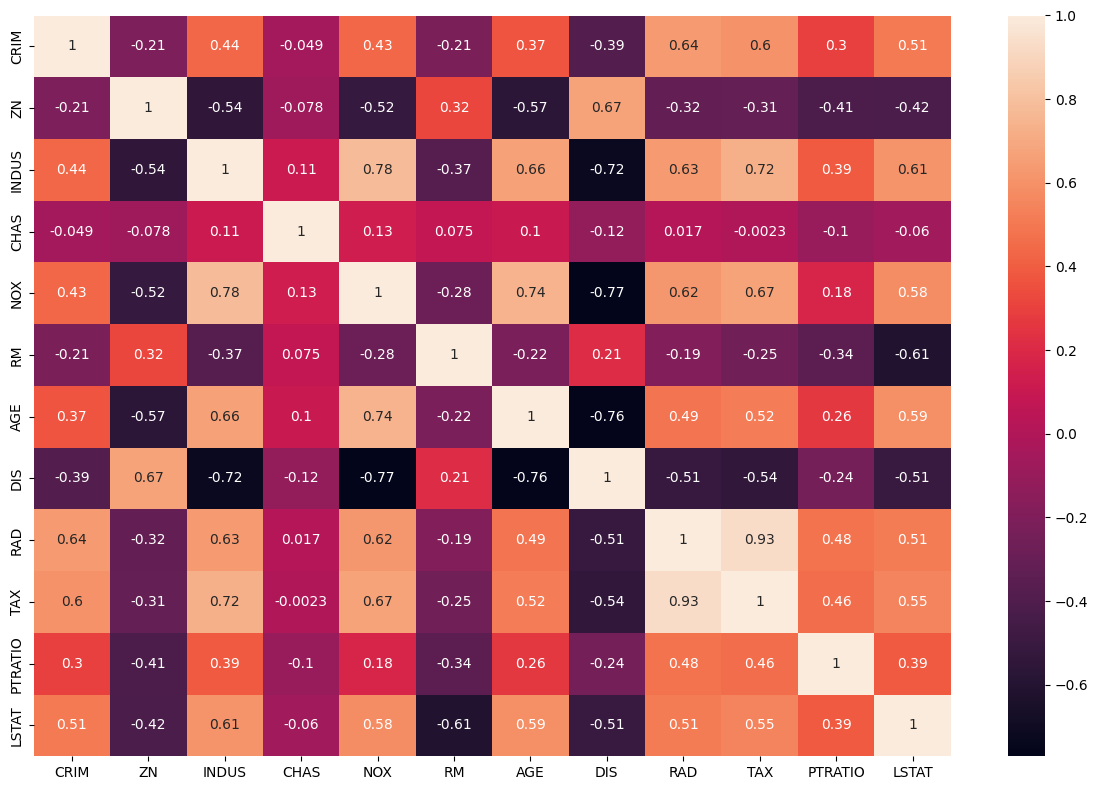

In [29]:
plt.subplots(figsize=(12,8))
sns.heatmap(X_train.corr(numeric_only=True), annot=True)
plt.tight_layout()
plt.show()

---
### 3.4.1 Pair plots of correlations between features

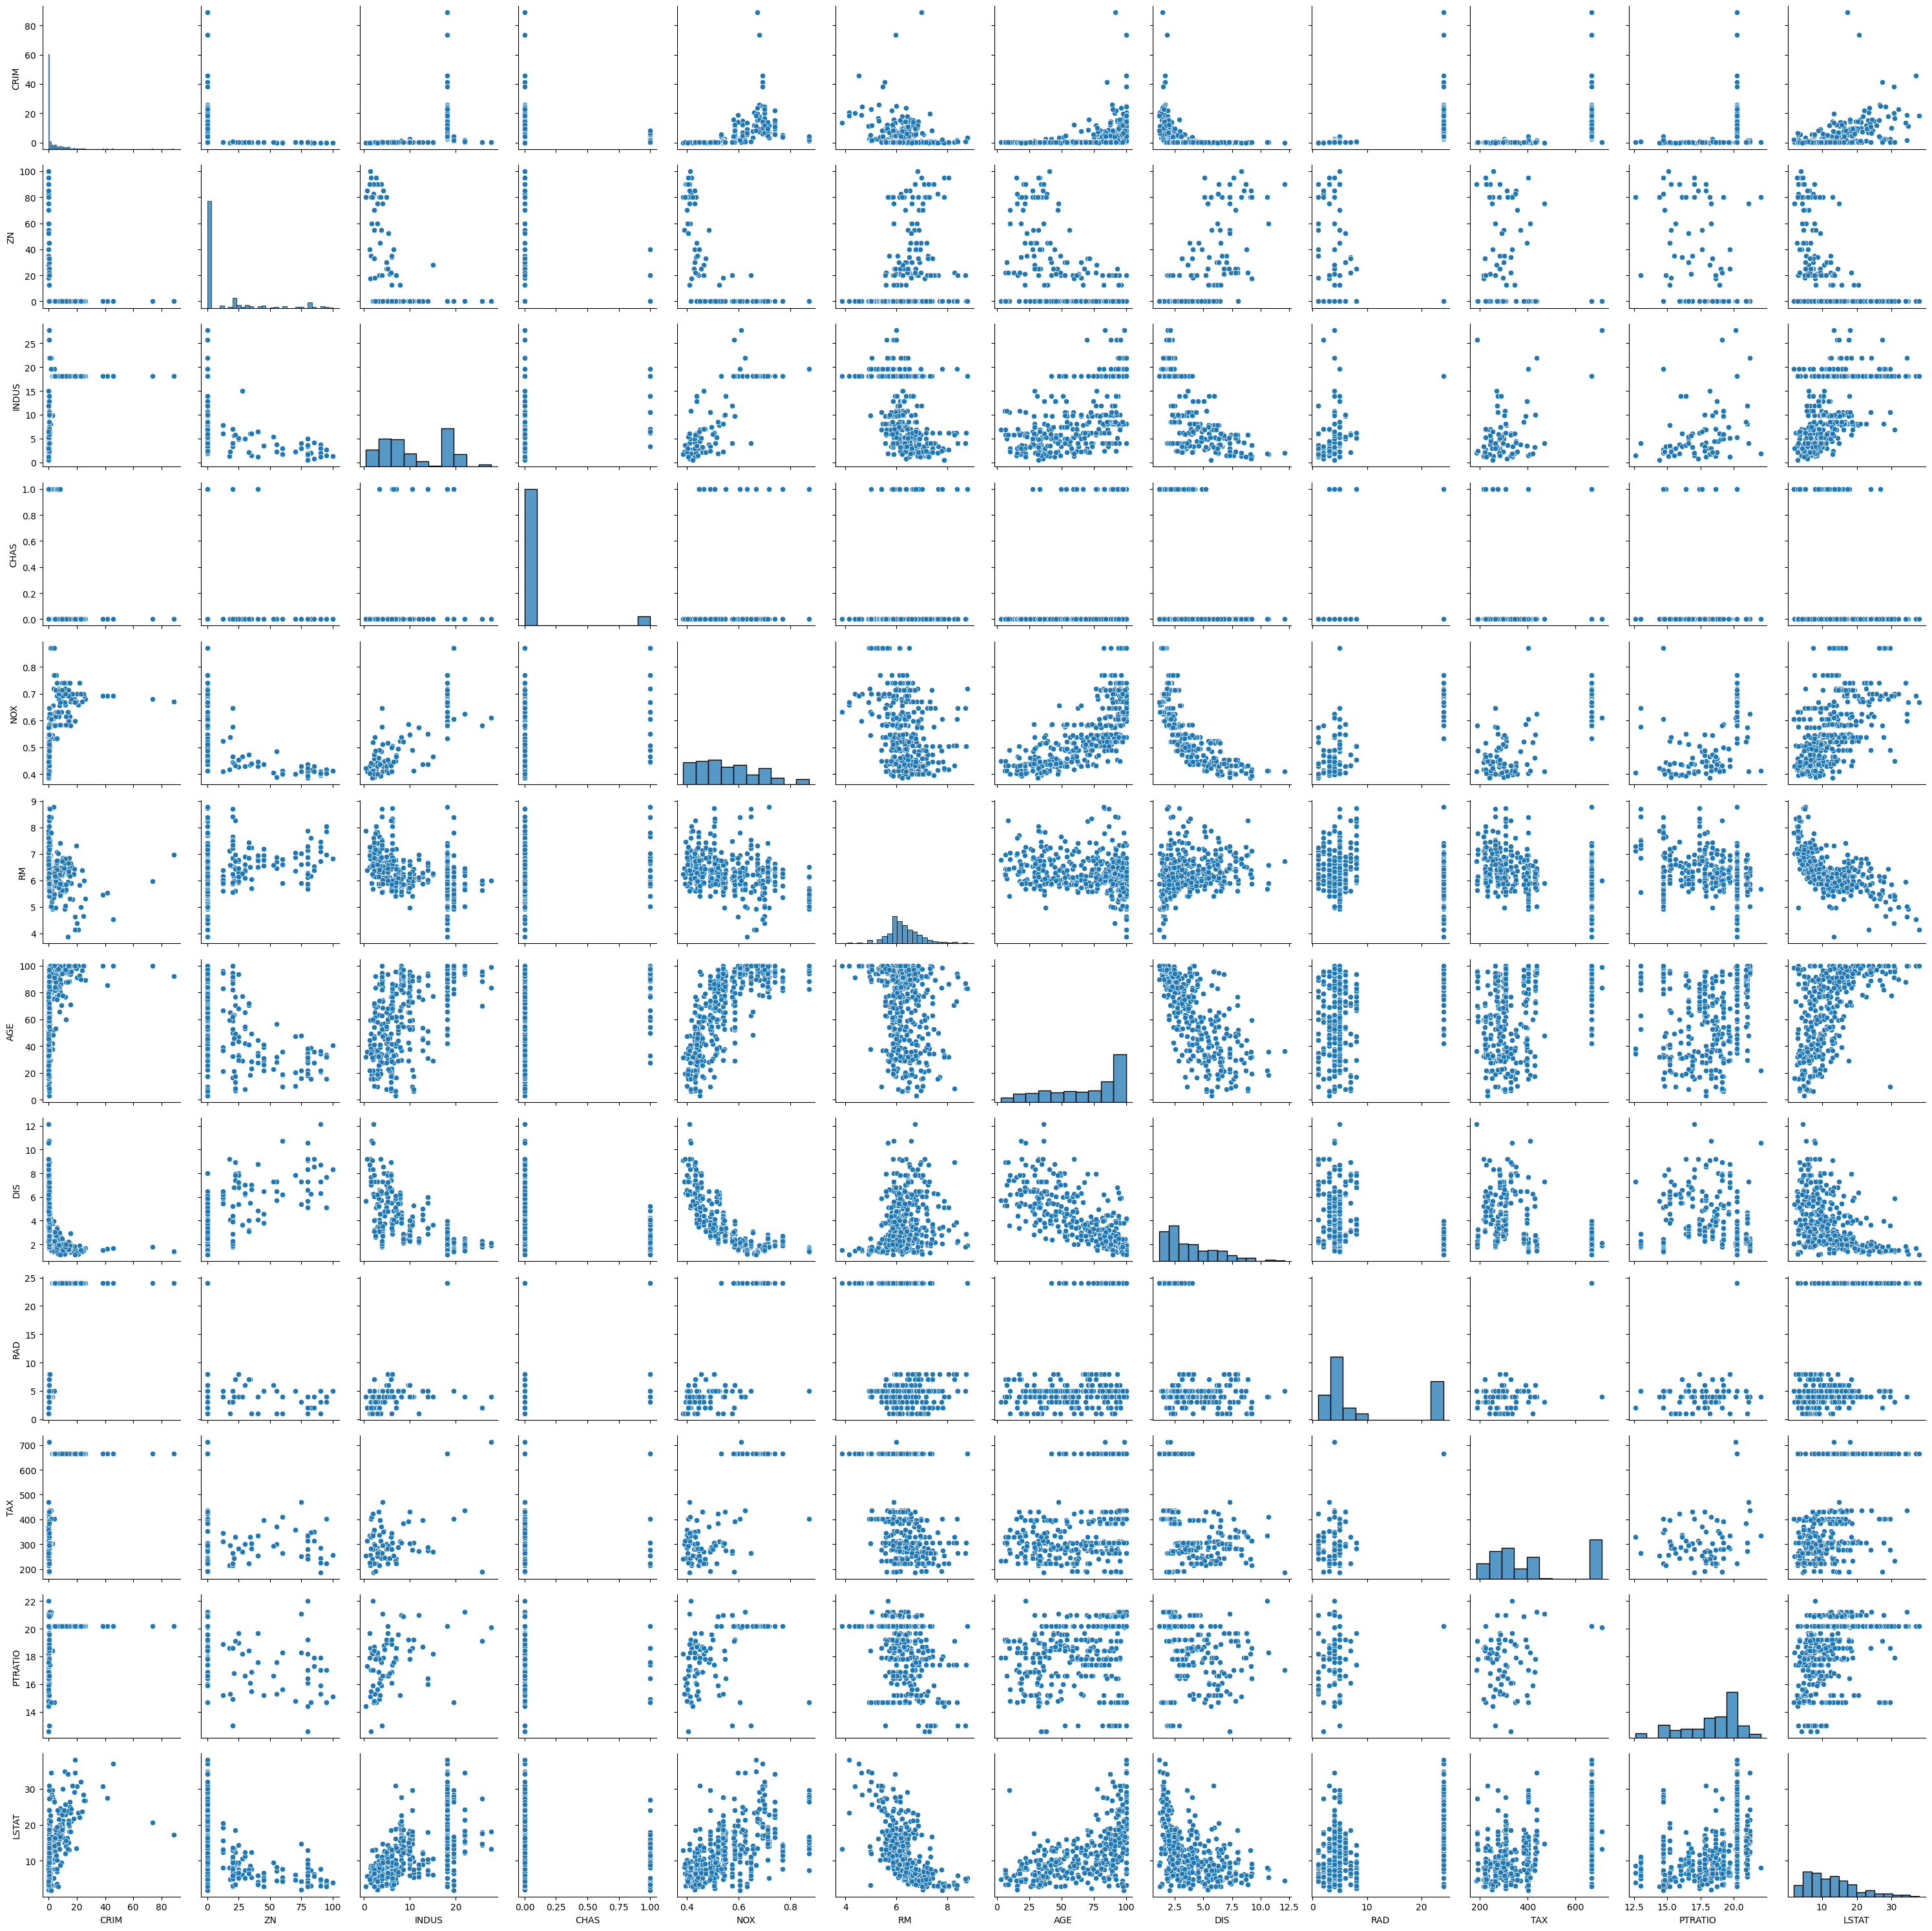

In [30]:
sns.pairplot(X_train)
plt.tight_layout()

***Initial Ideas:***
- DIS: Probably a good idea to remove  
    - very strong negative correlates with AGE, NOX and INUDS
    - medium to strong negative correlations with LSTAT, TAX, RAD
    

***Significant Features Selection:***  
- Going to keep the following all features with an asbolute correlation coefficient over 0.5
- Dont want to overcomplicate the model and it will make cleaning/transformations more manageable

sig_features = ['LSTAT','INDUS','TAX','CRIM','NOX','RM']

In [31]:
# Create variable of significant features
sig_features = ['LSTAT','INDUS','TAX','CRIM','NOX','RM']

In [32]:
# Keep only significant features to be used in the model 
X_train = X_train[sig_features]
X_test = X_test[sig_features]

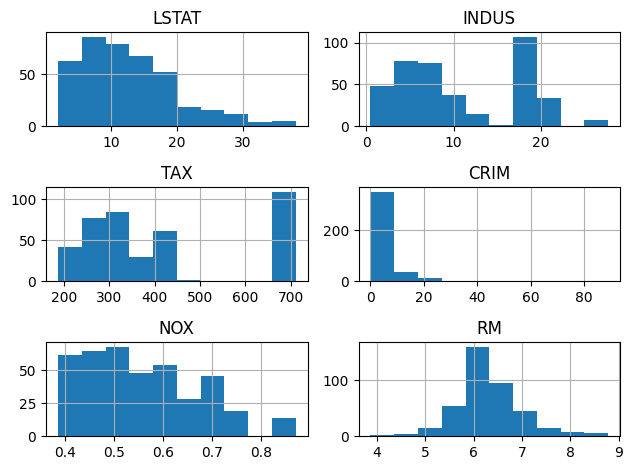

In [33]:
X_train.hist()
plt.tight_layout()
plt.show()

---
### 3.4 Feature Transformations

As linear regression models assume data to be normally distributed i will try transforming the features to get them closer to normal distribution

---
##### Log Transform 'NOX'

NOX Skewness: 0.7118
NOX Excess Kurtosis: -3.1806


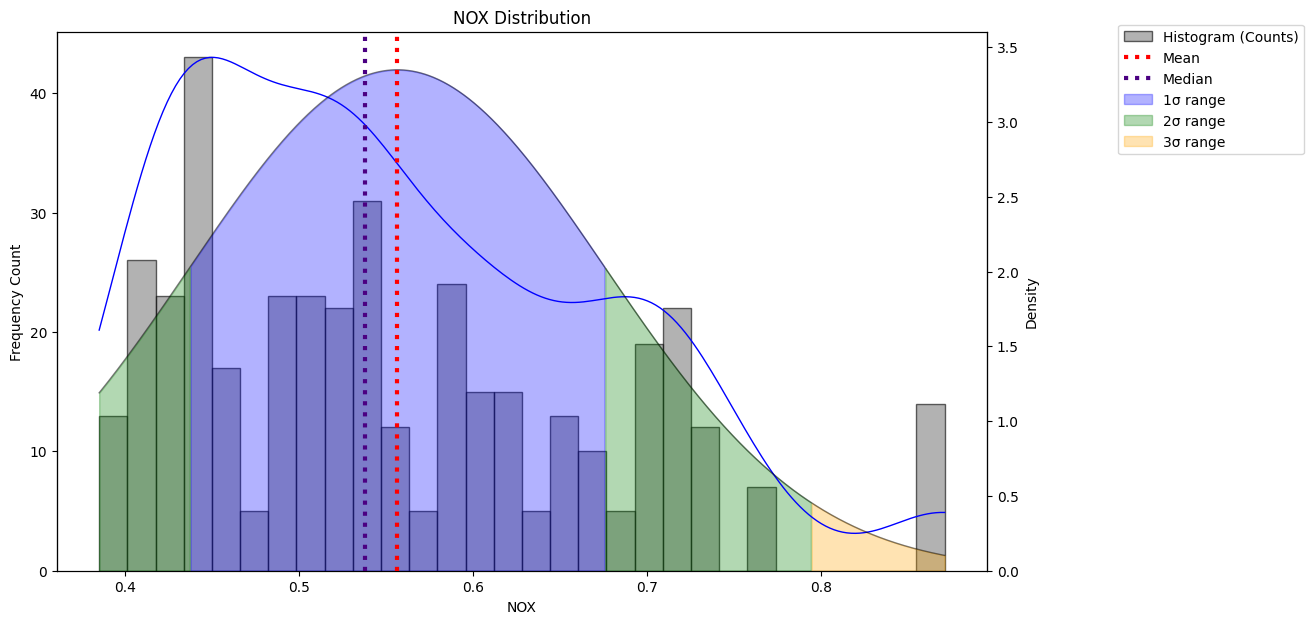

In [34]:
# View NOX distribution for 
tlbx.plot_histogram_kde_with_std(X_train, 'NOX', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [35]:
# Apply log transformation to NOX
X_train['log_NOX'] = np.log(X_train['NOX'])

log_NOX Skewness: 0.3534
log_NOX Excess Kurtosis: -3.7934


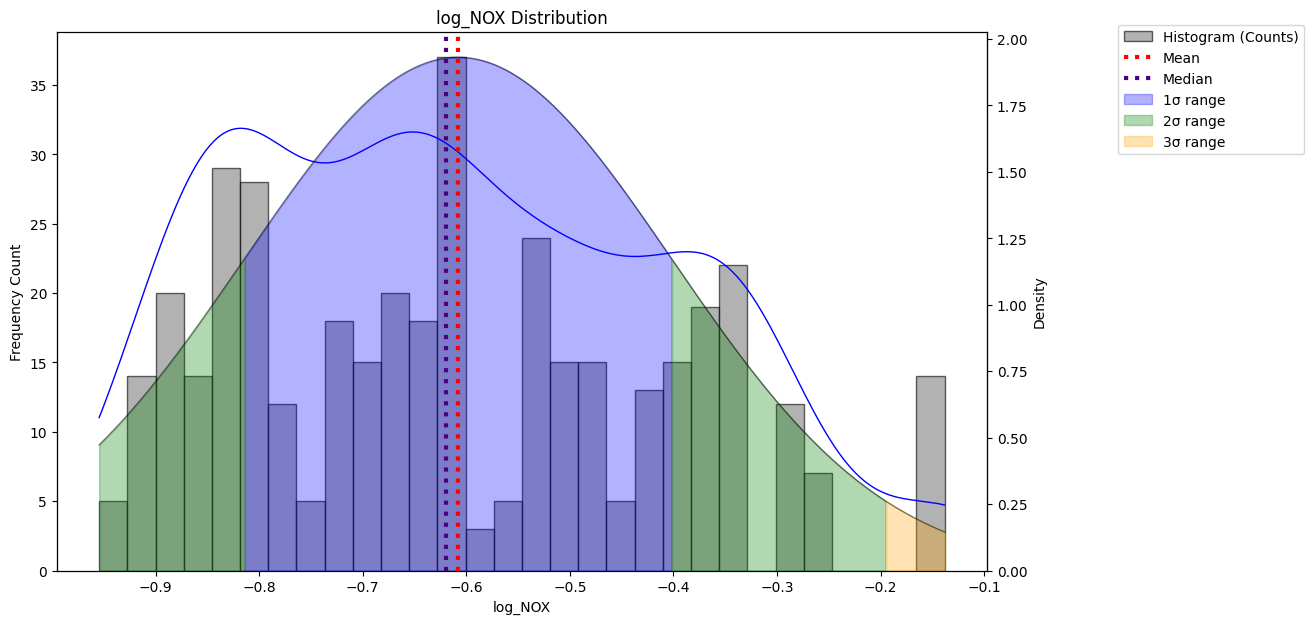

In [36]:
# Visualise the log distributions and skewness and kurtosis stats
tlbx.plot_histogram_kde_with_std(X_train, 'log_NOX', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [37]:
# Check to see how this affected correlation with target
print(f"Corr Coef NOX|MEDV: {X_train['NOX'].corr(y_train['MEDV'])}")
print(f"Corr Coef log_NOX|MEDV: {X_train['log_NOX'].corr(y_train['MEDV'])}")
print(f"Corr Coef log_NOX|log_MEDV: {X_train['log_NOX'].corr(y_train['log_MEDV'])}")
print()
print(f"Corr Coef NOX|MEDV_boxcox: {X_train['NOX'].corr(y_train['MEDV_boxcox'])}")
print(f"Corr Coef log_NOX|MEDV_boxcox: {X_train['log_NOX'].corr(y_train['MEDV_boxcox'])}")
print()
print(f"Corr Coef NOX|MEDV_YEOJO: {X_train['NOX'].corr(y_train['MEDV_YEOJO'])}")
print(f"Corr Coef log_NOX|MEDV_YEOJO: {X_train['log_NOX'].corr(y_train['MEDV_YEOJO'])}")



Corr Coef NOX|MEDV: -0.4215506300889836
Corr Coef log_NOX|MEDV: -0.4254893839627694
Corr Coef log_NOX|log_MEDV: -0.5109684139909704

Corr Coef NOX|MEDV_boxcox: -0.49264086310022986
Corr Coef log_NOX|MEDV_boxcox: -0.4978894848664388

Corr Coef NOX|MEDV_YEOJO: -0.4935717575332527
Corr Coef log_NOX|MEDV_YEOJO: -0.4988401597242514


- for all target transformations stronger correlation with log_nox
- log transformation improved symmetry but slightly inceased excess kurtosis
- Going to try using log_nox as it seems to have brought the distribution closer to normal

---
##### boxcox Transformation of NOX

In [38]:
# Try applying boxcox transformation to NOX
X_train['boxcox_NOX'], lambda_boxcox = stats.boxcox(X_train['NOX'])


boxcox_NOX Skewness: 0.0653
boxcox_NOX Excess Kurtosis: -4.035


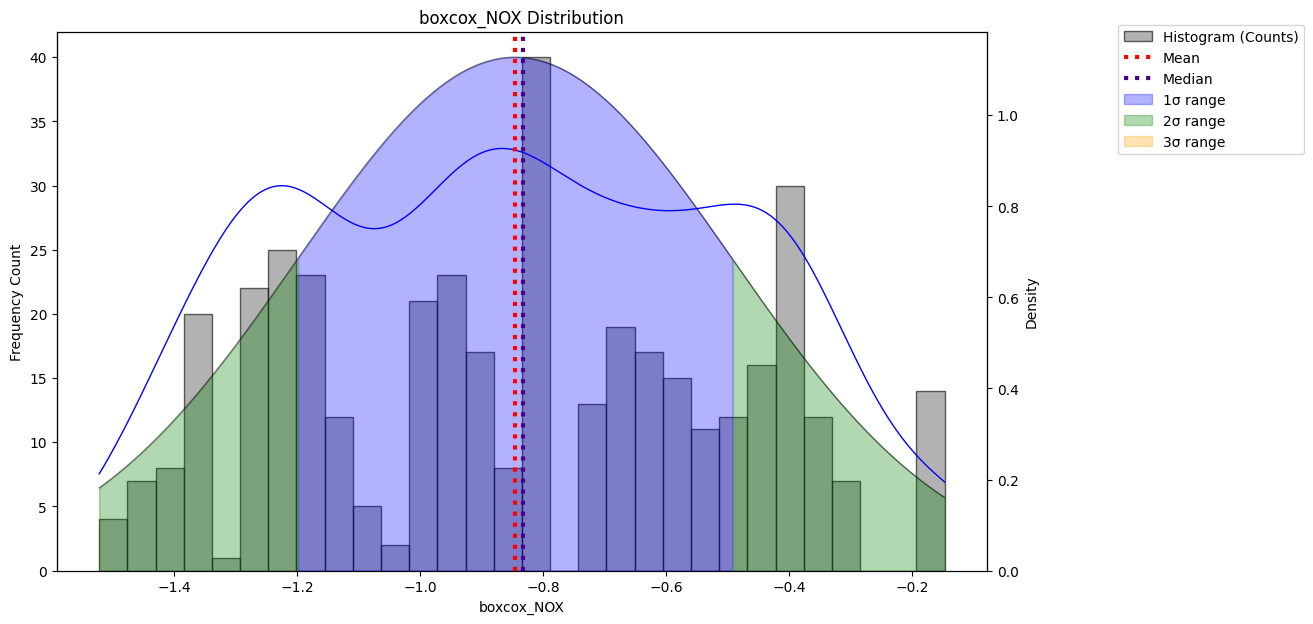

In [39]:
tlbx.plot_histogram_kde_with_std(X_train, 'boxcox_NOX', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [40]:
# Check to see how this affected correlation with target
print(f"Corr Coef NOX|MEDV: {X_train['NOX'].corr(y_train['MEDV'])}")
print(f"Corr Coef boxcox_NOX|MEDV: {X_train['boxcox_NOX'].corr(y_train['MEDV'])}")
print(f"Corr Coef boxcox_NOX|boxcox_MEDV: {X_train['boxcox_NOX'].corr(y_train['MEDV_boxcox'])}")
print()
print(f"Corr Coef NOX|MEDV_boxcox: {X_train['NOX'].corr(y_train['MEDV_boxcox'])}")
print(f"Corr Coef boxcox_NOX|MEDV_boxcox: {X_train['boxcox_NOX'].corr(y_train['MEDV_boxcox'])}")
print()
print(f"Corr Coef NOX|MEDV_YEOJO: {X_train['NOX'].corr(y_train['MEDV_YEOJO'])}")
print(f"Corr Coef boxcox_NOX|MEDV_YEOJO: {X_train['boxcox_NOX'].corr(y_train['MEDV_YEOJO'])}")

Corr Coef NOX|MEDV: -0.4215506300889836
Corr Coef boxcox_NOX|MEDV: -0.4237811483678965
Corr Coef boxcox_NOX|boxcox_MEDV: -0.49567682872739927

Corr Coef NOX|MEDV_boxcox: -0.49264086310022986
Corr Coef boxcox_NOX|MEDV_boxcox: -0.49567682872739927

Corr Coef NOX|MEDV_YEOJO: -0.4935717575332527
Corr Coef boxcox_NOX|MEDV_YEOJO: -0.49663023825938546


- log_NOX had a better overall improvement to correlations/distribution stats than boxcox
- doesnt seem worth using boxcox_NOX for the tiniest of correlation gain when i quite significantly increase excess kurtosis

---
##### Log Transform 'CRIM'

CRIM Skewness: 5.4952
CRIM Excess Kurtosis: 40.5971


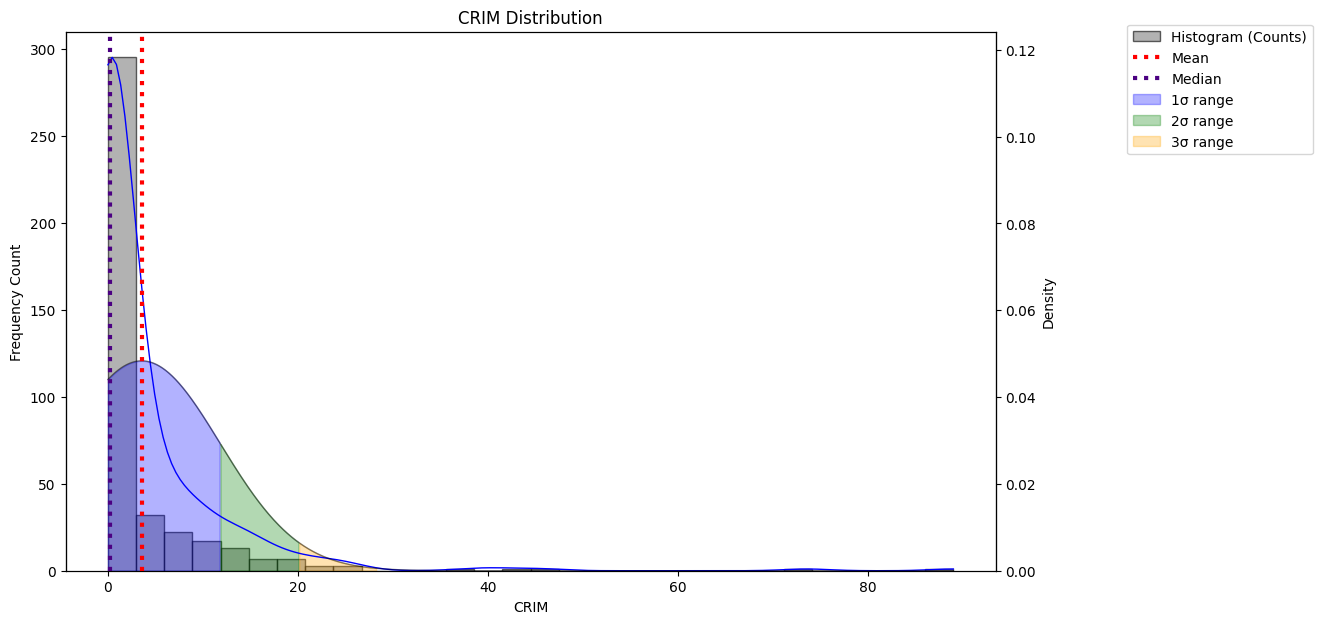

In [41]:
# View CRIM distribution for 
tlbx.plot_histogram_kde_with_std(X_train, 'CRIM', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [42]:
# Apply log transformation to CRIM
X_train['log_CRIM'] = np.log(X_train['CRIM'])

log_CRIM Skewness: 0.3844
log_CRIM Excess Kurtosis: -4.0689


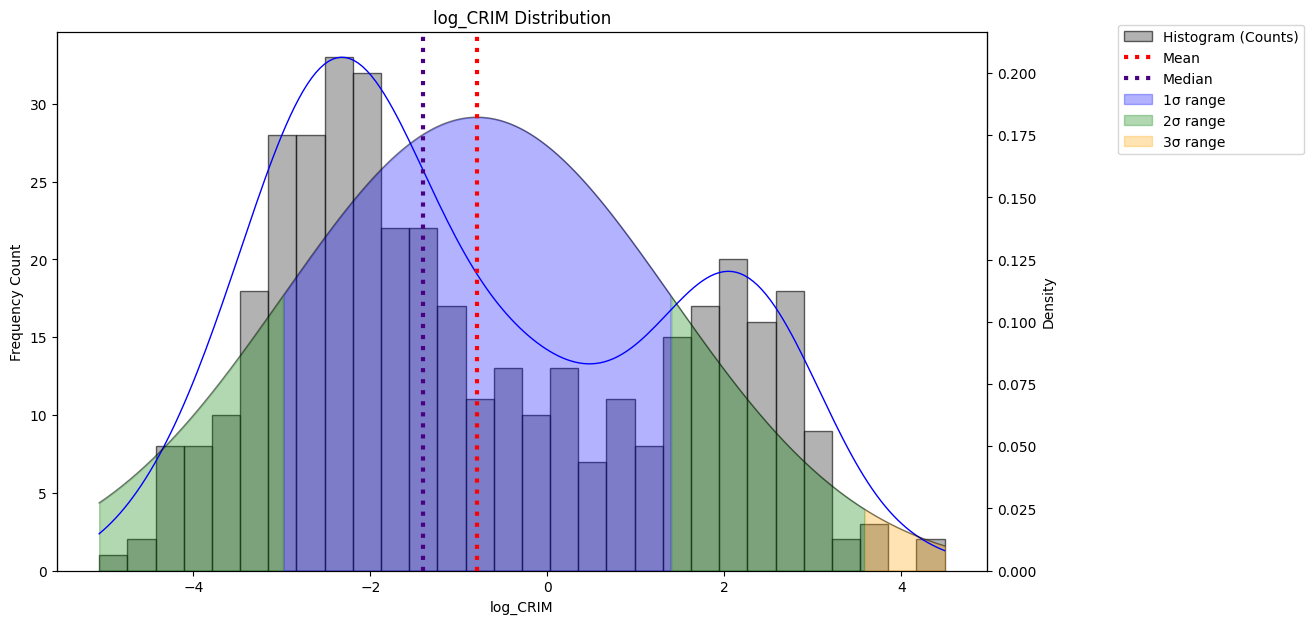

In [43]:
# View log_CRIM distribution for 
tlbx.plot_histogram_kde_with_std(X_train, 'log_CRIM', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [44]:
# Check to see how this affected correlation with target
X_train['log_CRIM'].corr(y_train['MEDV'])


-0.4575715911591006

In [45]:
# Check to see how this affected correlation with target
print(f"Corr Coef CRIM|MEDV: {X_train['CRIM'].corr(y_train['MEDV'])}")
print(f"Corr Coef log_CRIM|MEDV: {X_train['log_CRIM'].corr(y_train['MEDV'])}")
print(f"Corr Coef log_CRIM|log_MEDV: {X_train['log_CRIM'].corr(y_train['log_MEDV'])}")
print()
print(f"Corr Coef CRIM|MEDV_boxcox: {X_train['CRIM'].corr(y_train['MEDV_boxcox'])}")
print(f"Corr Coef log_CRIM|MEDV_boxcox: {X_train['log_CRIM'].corr(y_train['MEDV_boxcox'])}")
print()
print(f"Corr Coef CRIM|MEDV_YEOJO: {X_train['CRIM'].corr(y_train['MEDV_YEOJO'])}")
print(f"Corr Coef log_CRIM|MEDV_YEOJO: {X_train['log_CRIM'].corr(y_train['MEDV_YEOJO'])}")



Corr Coef CRIM|MEDV: -0.392389921725278
Corr Coef log_CRIM|MEDV: -0.4575715911591006
Corr Coef log_CRIM|log_MEDV: -0.5793629696457938

Corr Coef CRIM|MEDV_boxcox: -0.5045508403454236
Corr Coef log_CRIM|MEDV_boxcox: -0.5579158123875858

Corr Coef CRIM|MEDV_YEOJO: -0.5049808961467561
Corr Coef log_CRIM|MEDV_YEOJO: -0.5589150139745042


- log transformation to CRIM massively reduced skewness
- massive improvement to kurtosis as well
- improved correlations for all target transformations
- going to use log_CRIM

---
##### Log Transform 'LSTAT'

LSTAT Skewness: 0.9600
LSTAT Excess Kurtosis: -2.308


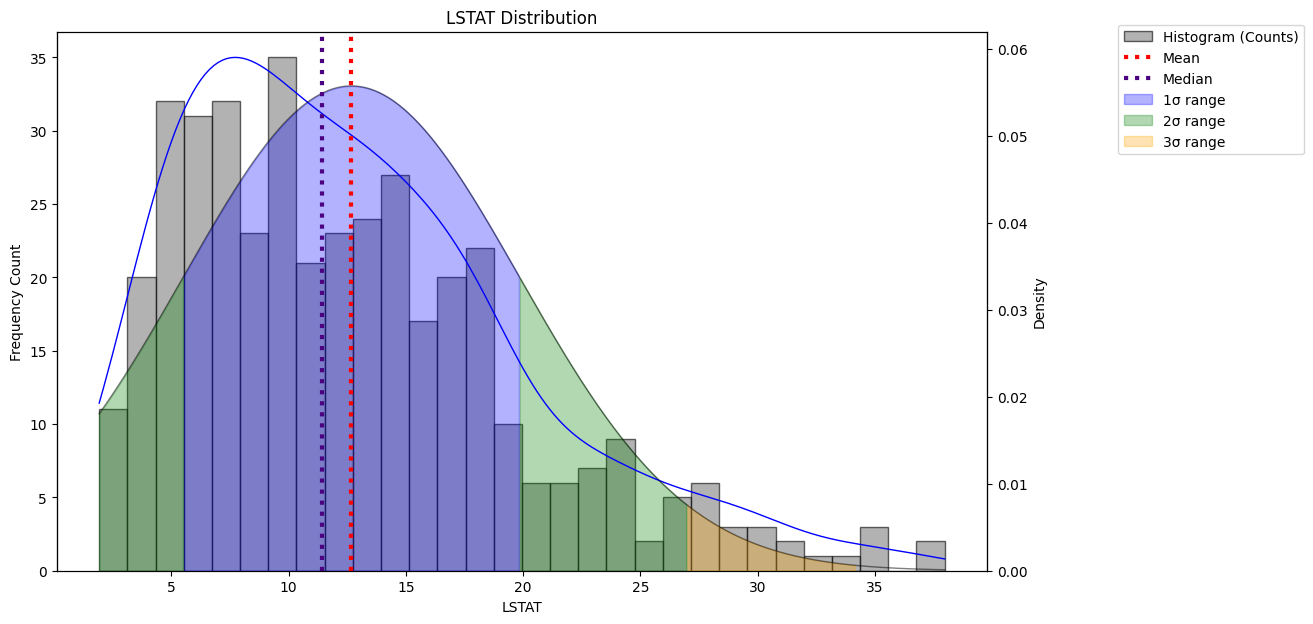

In [46]:
# View CRIM distribution for 
tlbx.plot_histogram_kde_with_std(X_train, 'LSTAT', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [47]:
# Apply log transformation to CRIM
X_train['log_LSTAT'] = np.log(X_train['LSTAT'])

log_LSTAT Skewness: -0.3099
log_LSTAT Excess Kurtosis: -3.4139


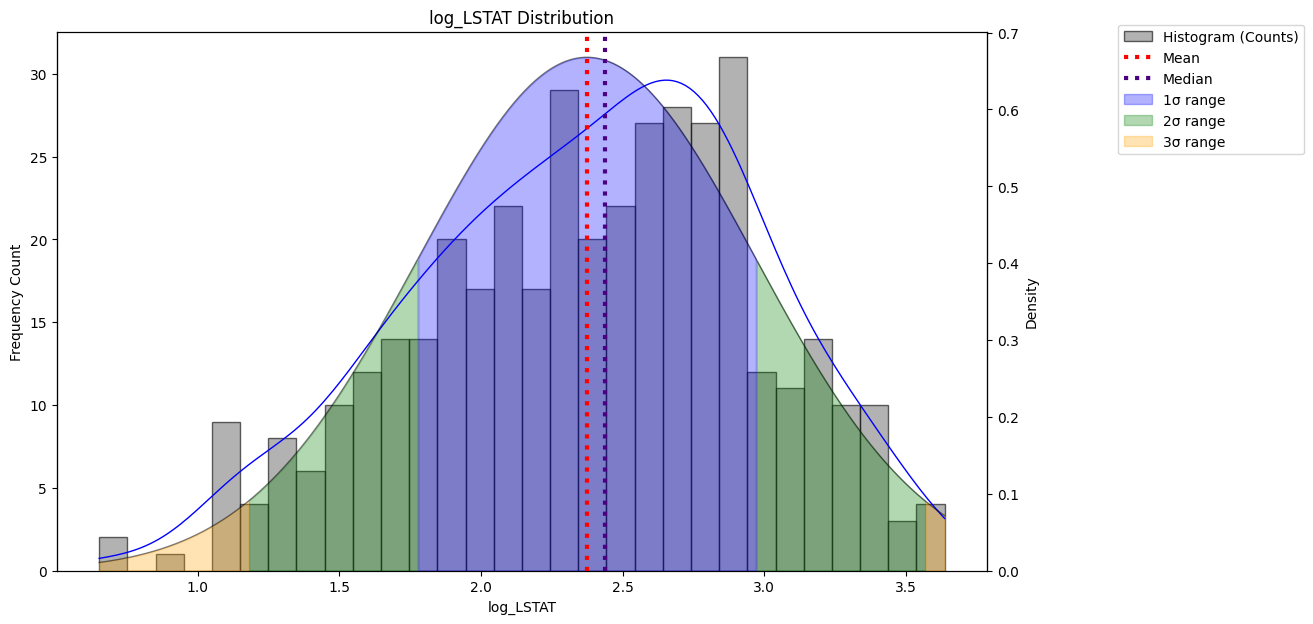

In [48]:
# View log_LSTAT distribution for 
tlbx.plot_histogram_kde_with_std(X_train, 'log_LSTAT', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

---
##### boxcox transformation of LSTAT

In [49]:
# Try applying boxcox transformation to LSTAT
X_train['boxcox_LSTAT'], lambda_boxcox = stats.boxcox(X_train['LSTAT'])


boxcox_LSTAT Skewness: -0.0246
boxcox_LSTAT Excess Kurtosis: -3.5444


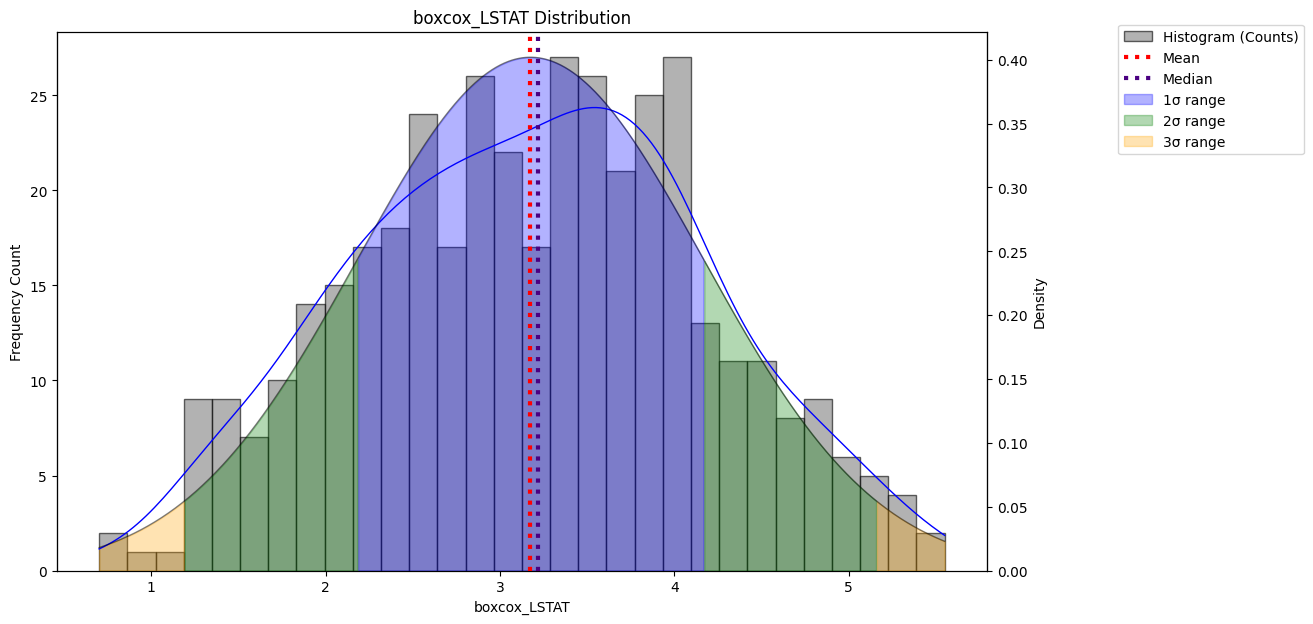

In [50]:
tlbx.plot_histogram_kde_with_std(X_train, 'boxcox_LSTAT', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [51]:
# Check to see how this affected correlation with target
print(f"Corr Coef LSTAT|MEDV: {X_train['LSTAT'].corr(y_train['MEDV'])}")
print(f"Corr Coef boxcox_LSTAT|MEDV: {X_train['boxcox_LSTAT'].corr(y_train['MEDV'])}")
print(f"Corr Coef boxcox_LSTAT|boxcox_MEDV: {X_train['boxcox_LSTAT'].corr(y_train['MEDV_boxcox'])}")
print()
print(f"Corr Coef LSTAT|MEDV_boxcox: {X_train['LSTAT'].corr(y_train['MEDV_boxcox'])}")
print(f"Corr Coef boxcox_LSTAT|MEDV_boxcox: {X_train['boxcox_LSTAT'].corr(y_train['MEDV_boxcox'])}")
print()
print(f"Corr Coef LSTAT|MEDV_YEOJO: {X_train['LSTAT'].corr(y_train['MEDV_YEOJO'])}")
print(f"Corr Coef boxcox_LSTAT|MEDV_YEOJO: {X_train['boxcox_LSTAT'].corr(y_train['MEDV_YEOJO'])}")

Corr Coef LSTAT|MEDV: -0.7384155946397597
Corr Coef boxcox_LSTAT|MEDV: -0.8069423731930232
Corr Coef boxcox_LSTAT|boxcox_MEDV: -0.8361605728043929

Corr Coef LSTAT|MEDV_boxcox: -0.8020461409137122
Corr Coef boxcox_LSTAT|MEDV_boxcox: -0.8361605728043929

Corr Coef LSTAT|MEDV_YEOJO: -0.8025871725140433
Corr Coef boxcox_LSTAT|MEDV_YEOJO: -0.8365466575185116


- boxcox transformation improves skewness of LSTAT but slightly increase the excess kurtosis
- ??? CONCERN: Will increasing the excess kurtosis of features and targets massively reduce the model capacity to predict more extreme values ???
- Correlation coefficients have increased for all target transformations.

---
#### 3.5 Final Feature Selection
Although there are more transformations that could be investigated, for now I am going to continue to build the model on the following features:
- log_NOX
- log_CRIM
- boxcox_LSTAT
- INDUS
- TAX
- RM
trans_sig_features = ['log_NOX','log_CRIM','boxcos_LSTAT','INDUS','TAX','RM']

In [52]:
trans_sig_features = ['log_NOX','log_CRIM','boxcox_LSTAT','INDUS','TAX','RM']

In [53]:
# Apply transformations to X_test as well
X_test['log_NOX'] = np.log(X_test['NOX'])
X_test['log_CRIM'] = np.log(X_test['CRIM'])
X_test['boxcox_LSTAT'], lambda_boxcox = stats.boxcox(X_test['LSTAT'])

---
---
# 3.5 Build Model
---
---

### 3.5.1 Training

In [54]:
# Create the linreg object
linreg = LinearRegression()
linreg_logy = LinearRegression()
linreg_boxcoxy = LinearRegression()
linreg_yeojoy = LinearRegression()

# Train the model with the data
linreg.fit(X_train[trans_sig_features], y_train['MEDV'])
linreg_logy.fit(X_train[trans_sig_features], y_train['log_MEDV'])
linreg_boxcoxy.fit(X_train[trans_sig_features], y_train['MEDV_boxcox'])
linreg_yeojoy.fit(X_train[trans_sig_features], y_train['MEDV_YEOJO'])

LinearRegression()

In [55]:
print(f"linreg intercept: {linreg.intercept_}")
print(f"linreg log target intercept: {linreg_logy.intercept_}")
print(f"linreg boxcox target intercept: {linreg_boxcoxy.intercept_}")
print(f"linreg yeo-johnson target intercept: {linreg_yeojoy.intercept_}")

linreg intercept: 27.155402138823995
linreg log target intercept: 3.5496472911267594
linreg boxcox target intercept: 5.1872457503956
linreg yeo-johnson target intercept: 1.1056685357282445


In [56]:
linreg.coef_

array([ 1.32427904,  0.74083962, -6.19495085,  0.03721918, -0.01172394,
        3.29188911])

In [57]:
# Original target feature coefficients ordered by importance
coef_df = pd.DataFrame(linreg.coef_, X_train[trans_sig_features].columns,
                       columns=['Coefficient'])
coef_df.sort_values('Coefficient', ascending=False)

,Coefficient
RM,3.291889
log_NOX,1.324279
log_CRIM,0.740840
INDUS,0.037219
TAX,-0.011724
boxcox_LSTAT,-6.194951


$Average Price = 2.522817 \times \text{log\_NOX} +
0.399989 \times \text{log\_CRIM} +
-5.071814 \times \text{boxcox\_LSTAT} +
0.044168 \times \text{INDUS} +
-0.012758 \times \text{TAX} +
4.333986 \times \text{RM}$


In [58]:
# log target feature coefficients ordered by importance
coef_log_y = pd.DataFrame(linreg_logy.coef_, X_train[trans_sig_features].columns,
                       columns=['Coefficient'])
coef_log_y.sort_values('Coefficient', ascending=False)

,Coefficient
RM,0.089758
log_NOX,0.067521
INDUS,0.004768
TAX,-0.000530
log_CRIM,-0.001900
boxcox_LSTAT,-0.277285


In [59]:
# boxcoc target feature coefficients ordered by importance
coef_bc_y = pd.DataFrame(linreg_boxcoxy.coef_, X_train[trans_sig_features].columns,
                       columns=['Coefficient'])
coef_bc_y.sort_values('Coefficient', ascending=False)

,Coefficient
RM,0.198011
log_NOX,0.120624
log_CRIM,0.011996
INDUS,0.007586
TAX,-0.001019
boxcox_LSTAT,-0.535261


In [60]:
# Yeo-Johnson target feature coefficients ordered by importance
coef_yeojo_y = pd.DataFrame(linreg_yeojoy.coef_, X_train[trans_sig_features].columns,
                       columns=['Coefficient'])
coef_yeojo_y.sort_values('Coefficient', ascending=False)

,Coefficient
RM,0.252187
log_NOX,0.152278
log_CRIM,0.014988
INDUS,0.009677
TAX,-0.001303
boxcox_LSTAT,-0.684355


In [61]:
# Use models to make predictions
predictions = linreg.predict(X_test[trans_sig_features])

pred_log_y = linreg_logy.predict(X_test[trans_sig_features])
predictions_log_y = np.exp(pred_log_y)

pred_boxcox_y = linreg_boxcoxy.predict(X_test[trans_sig_features])
predictions_boxcox_y = inv_boxcox(pred_boxcox_y, lambda_boxcox)

pred_yeojo_y = linreg_yeojoy.predict(X_test[trans_sig_features])
pred_yeojo_y_reshaped = pred_yeojo_y.reshape(-1,1)
predictions_yeojo_y = pt.inverse_transform(pred_yeojo_y_reshaped)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


---
---
# Model Evaluations
---
---

### Original Target Model with transformed features

In [62]:
pred_train = linreg.predict(X_train[trans_sig_features])
print("Train Error:")
print("MAE train:", metrics.mean_absolute_error(y_train['MEDV'], pred_train))
print("MSE train:", metrics.mean_squared_error(y_train['MEDV'], pred_train))
print("RMSE train:", np.sqrt(metrics.mean_squared_error(y_train['MEDV'], pred_train)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_train['MEDV'], pred_train))
print("R2 train:", linreg.score(X_train[trans_sig_features], y_train['MEDV']))
print()
print("Test Error:")
print("MAE test:", metrics.mean_absolute_error(y_test['MEDV'], predictions))
print("MSE test:", metrics.mean_squared_error(y_test['MEDV'], predictions))
print("RMSE test:", np.sqrt(metrics.mean_squared_error(y_test['MEDV'], predictions)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_test['MEDV'], predictions))
print("R2 test:", linreg.score(X_test[trans_sig_features], y_test['MEDV']))

Train Error:
MAE train: 3.5420868255597817
MSE train: 24.56149064735855
RMSE train: 4.95595506914243
MAPE: 0.17741476542577272
R2 train: 0.703123000678488

Test Error:
MAE test: 4.208168784974789
MSE test: 28.590414048443545
RMSE test: 5.347000472081851
MAPE: 0.21147115836117325
R2 test: 0.6846418308768611


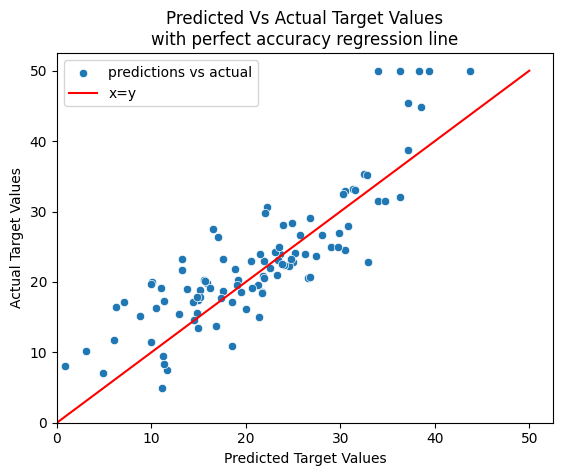

In [63]:
# Visualise performance of each model
sns.scatterplot(x=predictions, y=y_test['MEDV'], label='predictions vs actual')

max_val = max(max(y_test['MEDV']), max(predictions))

plt.plot([0, max_val], [0 ,max_val], 'red', label='x=y')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel('Predicted Target Values')
plt.ylabel('Actual Target Values')
plt.title(f'Predicted Vs Actual Target Values\nwith perfect accuracy regression line')

plt.legend()
plt.show()

---
### log_MEDV model

In [64]:
pred_train = linreg_logy.predict(X_train[trans_sig_features])
#pred_train = np.exp(pred_train)

print("Train Error:")
print("MAE train:", metrics.mean_absolute_error(y_train['log_MEDV'], pred_train))
print("MSE train:", metrics.mean_squared_error(y_train['log_MEDV'], pred_train))
print("RMSE train:", np.sqrt(metrics.mean_squared_error(y_train['log_MEDV'], pred_train)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_train['log_MEDV'], pred_train))
print("R2 train:", linreg_logy.score(X_train[trans_sig_features], y_train['log_MEDV']))
print()
print("Test Error:")
print("MAE test:", metrics.mean_absolute_error(y_test['log_MEDV'], pred_log_y))
print("MSE test:", metrics.mean_squared_error(y_test['log_MEDV'], pred_log_y))
print("RMSE test:", np.sqrt(metrics.mean_squared_error(y_test['log_MEDV'], pred_log_y)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_test['log_MEDV'], pred_log_y))
print("R2 test:", linreg_logy.score(X_test[trans_sig_features], y_test['log_MEDV']))

Train Error:
MAE train: 0.1544766665807713
MSE train: 0.044523950871329286
RMSE train: 0.21100699247022428
MAPE: 0.05352351421370315
R2 train: 0.7276253391967884

Test Error:
MAE test: 0.1853432467727072
MSE test: 0.05932651579394866
RMSE test: 0.24357035081049716
MAPE: 0.0646693020950021
R2 test: 0.6688552540616013


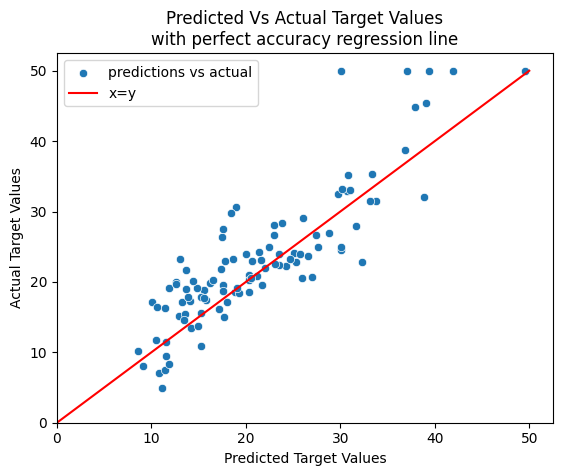

In [65]:
# Visualise performance of each model
sns.scatterplot(x=predictions_log_y, y=y_test['MEDV'], label='predictions vs actual')

max_val = max(max(y_test['MEDV']), max(pred_log_y))

plt.plot([0, max_val], [0 ,max_val], 'red', label='x=y')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel('Predicted Target Values')
plt.ylabel('Actual Target Values')
plt.title(f'Predicted Vs Actual Target Values\nwith perfect accuracy regression line')

plt.legend()
plt.show()

---
### boxcox model

In [66]:
pred_train = linreg_boxcoxy.predict(X_train[trans_sig_features])
pred_train = inv_boxcox(pred_train, lambda_boxcox)

print("Train Error:")
print("MAE train:", metrics.mean_absolute_error(y_train['MEDV'], pred_train))
print("MSE train:", metrics.mean_squared_error(y_train['MEDV'], pred_train))
print("RMSE train:", np.sqrt(metrics.mean_squared_error(y_train['MEDV'], pred_train)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_train['MEDV'], pred_train))
print("R2 train:", linreg_boxcoxy.score(X_train[trans_sig_features], y_train['MEDV_boxcox']))
print()
print("Test Error:")
print("MAE test:", metrics.mean_absolute_error(y_test['MEDV'], predictions_boxcox_y))
print("MSE test:", metrics.mean_squared_error(y_test['MEDV'], predictions_boxcox_y))
print("RMSE test:", np.sqrt(metrics.mean_squared_error(y_test['MEDV'], predictions_boxcox_y)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_test['MEDV'], predictions_boxcox_y))
print("R2 test:", linreg_boxcoxy.score(X_test[trans_sig_features], y_test['MEDV_boxcox']))

Train Error:
MAE train: 4.521592684692135
MSE train: 42.91812889483356
RMSE train: 6.551192936773695
MAPE: 0.1849574091869496
R2 train: 0.7315404151664462

Test Error:
MAE test: 5.664389526349985
MSE test: 53.24238817359981
RMSE test: 7.296738187272434
MAPE: 0.23820863801479278
R2 test: 0.6860209626264152


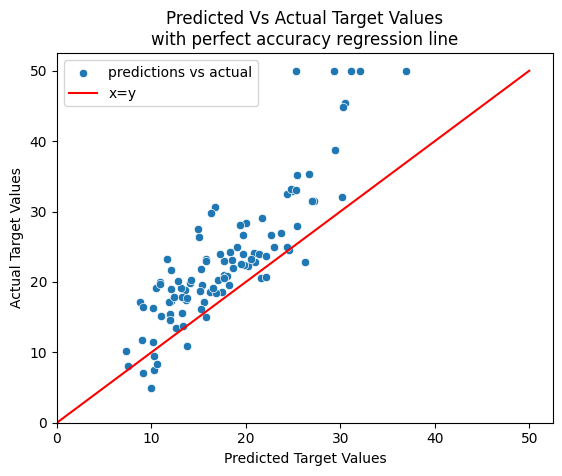

In [67]:
# Visualise performance of each model
sns.scatterplot(x=predictions_boxcox_y, y=y_test['MEDV'], label='predictions vs actual')

max_val = max(max(y_test['MEDV']), max(predictions_boxcox_y))

plt.plot([0, max_val], [0 ,max_val], 'red', label='x=y')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel('Predicted Target Values')
plt.ylabel('Actual Target Values')
plt.title(f'Predicted Vs Actual Target Values\nwith perfect accuracy regression line')

plt.legend()
plt.show()

---
### Yeo-Johnson Target model

In [68]:
pred_train = linreg_yeojoy.predict(X_train[trans_sig_features])
pred_train_reshaped = pred_train.reshape(-1,1)
pred_train = pt.inverse_transform(pred_train_reshaped)

print("Train Error:")
print("MAE train:", metrics.mean_absolute_error(y_train['MEDV'], pred_train))
print("MSE train:", metrics.mean_squared_error(y_train['MEDV'], pred_train))
print("RMSE train:", np.sqrt(metrics.mean_squared_error(y_train['MEDV'], pred_train)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_train['MEDV'], pred_train))
print("R2 train:", linreg_yeojoy.score(X_train[trans_sig_features], y_train['MEDV_YEOJO']))
print()
print("Test Error:")
print("MAE test:", metrics.mean_absolute_error(y_test['MEDV'], predictions_yeojo_y))
print("MSE test:", metrics.mean_squared_error(y_test['MEDV'], predictions_yeojo_y))
print("RMSE test:", np.sqrt(metrics.mean_squared_error(y_test['MEDV'], predictions_yeojo_y)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_test['MEDV'], predictions_yeojo_y))
print("R2 test:", linreg_yeojoy.score(X_test[trans_sig_features], y_test['MEDV_YEOJO']))

Train Error:
MAE train: 3.318626078587186
MSE train: 23.08950797667304
RMSE train: 4.805154313513047
MAPE: 0.15659355744073133
R2 train: 0.7321096804923138

Test Error:
MAE test: 3.7973593428666406
MSE test: 24.983623677231314
RMSE test: 4.9983620994513105
MAPE: 0.17828377414972948
R2 test: 0.6864353175829759


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


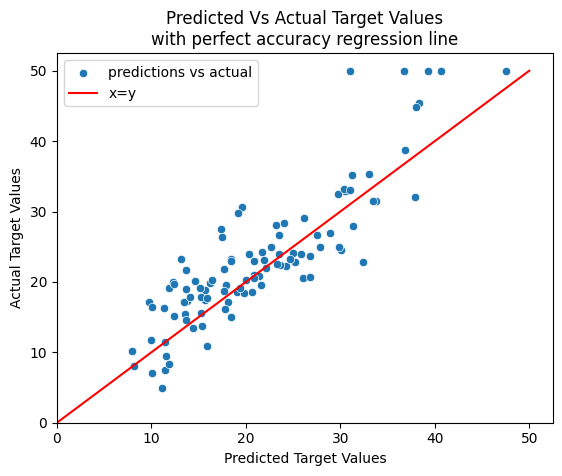

In [69]:
# Visualise performance of each model
sns.scatterplot(x=predictions_yeojo_y.flatten(), y=y_test['MEDV'], label='predictions vs actual')

max_val = max(max(y_test['MEDV']), max(predictions_yeojo_y.flatten()))

plt.plot([0, max_val], [0 ,max_val], 'red', label='x=y')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel('Predicted Target Values')
plt.ylabel('Actual Target Values')
plt.title(f'Predicted Vs Actual Target Values\nwith perfect accuracy regression line')

plt.legend()
plt.show()

---
# Metrics Evaluation
- log_MEDV model has best scores acoss all metrics
- R2 for Yeo_Johnson transformed target model has a slightly improved R2 for train and test but much higher error scores for all metrics
- regularize log_MEDV model


---


In [70]:
scaler = StandardScaler()
scaler.fit(X_train[trans_sig_features])

X_train_scaled = scaler.transform(X_train[trans_sig_features])

In [71]:
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train['log_MEDV'])

LinearRegression()

In [72]:
feat_coefs = pd.DataFrame(lr_scaled.coef_,
                          X_train[trans_sig_features].columns,
                                  columns=['Importance_standarized']).sort_values('Importance_standarized', ascending=False)
feat_coefs

,Importance_standarized
RM,0.061913
INDUS,0.032230
log_NOX,0.013930
log_CRIM,-0.004154
TAX,-0.088380
boxcox_LSTAT,-0.274884


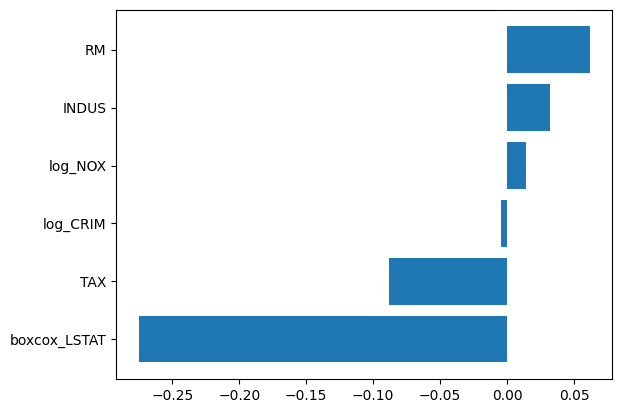

In [73]:
features = feat_coefs.sort_values('Importance_standarized')
plt.barh(features.index,features.Importance_standarized)
plt.show()

In [74]:
linreg2_feats = ['RM', 'TAX', 'boxcox_LSTAT']

In [75]:
linreg2 = LinearRegression()
linreg2.fit(X_train[linreg2_feats], y_train['log_MEDV'])

LinearRegression()

In [76]:
pred2 = linreg2.predict(X_test[linreg2_feats])

In [77]:
print('MAE test', metrics.mean_absolute_error(y_test['MEDV'], pred2))
print('MSE test', metrics.mean_squared_error(y_test['log_MEDV'], pred2))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test['log_MEDV'], pred2)))
print('R2 test', linreg2.score(X_test[linreg2_feats],y_test['log_MEDV']))

MAE test 20.14373695232451
MSE test 0.059162527587754705
RMSE test 0.24323348368955025
R2 test 0.6697705923745


Still moving foreward with original log_MEDV model and not removing the variables as R2 was still much higher

log_MEDV R2 test: 0.7338482309635534


---
# Ridge Regression

In [78]:
ridgeReg = Ridge(alpha = 30)
ridgeReg.fit(X_train[trans_sig_features], y_train['log_MEDV'])

print("Train MSE no regularization:", np.exp(round(metrics.mean_squared_error(y_train['log_MEDV'], linreg_logy.predict(X_train[trans_sig_features])),5)))
print("Test MSE no regularization:", np.exp(round(metrics.mean_squared_error(y_test['log_MEDV'], linreg_logy.predict(X_test[trans_sig_features])),5)))
print()
print("Train MSE with regularization:", np.exp(round(metrics.mean_squared_error(y_train['log_MEDV'], ridgeReg.predict(X_train[trans_sig_features])),5)))
print("Test MSE with regularization:", np.exp(round(metrics.mean_squared_error(y_test['log_MEDV'], ridgeReg.predict(X_test[trans_sig_features])),8)))

Train MSE no regularization: 1.0455258870190922
Test MSE no regularization: 1.061125354335169

Train MSE with regularization: 1.046195237756173
Test MSE with regularization: 1.057943585308724


Why are these so low? doesnt seem right but maybe it is.

In [79]:
# Loop through numbers 0 to 500 and find the alpha value that give the lowest test MSE
lowest_alpha = 0
best_testMSE = 100
trainMSE_best_alpha = 100
for alpha in range(0,500):
    
    ridgeReg = Ridge(alpha = alpha)
    ridgeReg.fit(X_train[trans_sig_features], y_train['log_MEDV'])
    
    trainMSE_best_alpha = np.exp(metrics.mean_squared_error(y_train['log_MEDV'], ridgeReg.predict(X_train[trans_sig_features])))
    test_MSE = np.exp(metrics.mean_squared_error(y_test['log_MEDV'], ridgeReg.predict(X_test[trans_sig_features])))
    
    if test_MSE > best_testMSE:
        break
    
    if test_MSE < best_testMSE:
        best_testMSE = test_MSE
        lowest_alpha = alpha
    else:
        best_testMSE = best_testMSE
        lowest_alpha = lowest_alpha
    
print("best ridge alpha for lowest test MSE:", lowest_alpha)
print("Best test MSE with regularization:", best_testMSE)
print("Test MSE no regularization:", np.exp(round(metrics.mean_squared_error(y_test['log_MEDV'], linreg_logy.predict(X_test[trans_sig_features])),5)))
print("Train MSE with best alpha for best test MSE:", trainMSE_best_alpha)

best ridge alpha for lowest test MSE: 69
Best test MSE with regularization: 1.0569912279975802
Test MSE no regularization: 1.061125354335169
Train MSE with best alpha for best test MSE: 1.0480235169587084


Getting the tiniest improvement in test MSE with the best Ridge alpha value 174.

---
### Lasso Regression

In [80]:
# Going to try the same priciple with Lasso to see what can be achieved
lassoR = Lasso(alpha=0.0001)
lassoR.fit(X_train[trans_sig_features], y_train['log_MEDV'])

print("Train MSE no regularization:", np.exp(round(metrics.mean_squared_error(y_train['log_MEDV'], linreg_logy.predict(X_train[trans_sig_features])),5)))
print("Test MSE no regularization:", np.exp(round(metrics.mean_squared_error(y_test['log_MEDV'], linreg_logy.predict(X_test[trans_sig_features])),5)))
print()
print("Train MSE with regularization:", np.exp(round(metrics.mean_squared_error(y_train['log_MEDV'], lassoR.predict(X_train[trans_sig_features])),5)))
print("Test MSE with regularization:", np.exp(round(metrics.mean_squared_error(y_test['log_MEDV'], lassoR.predict(X_test[trans_sig_features])),8)))

Train MSE no regularization: 1.0455258870190922
Test MSE no regularization: 1.061125354335169

Train MSE with regularization: 1.0455258870190922
Test MSE with regularization: 1.0611102015733003


In [81]:
# Loop through numbers 0 to 500 and find the alpha value that give the lowest test MSE
lowest_alpha = 0
best_testMSE = 100
trainMSE_best_alpha = 100
for alpha in np.arange(0.0009,0.01, 0.0001):

    lassoR = Lasso(alpha=alpha)
    lassoR.fit(X_train[trans_sig_features], y_train['log_MEDV'])
    
    trainMSE_best_alpha = np.exp(metrics.mean_squared_error(y_train['log_MEDV'], ridgeReg.predict(X_train[trans_sig_features])))
    test_MSE = np.exp(metrics.mean_squared_error(y_test['log_MEDV'], ridgeReg.predict(X_test[trans_sig_features])))
    
    if test_MSE > best_testMSE:
        break
    
    if test_MSE < best_testMSE:
        best_testMSE = test_MSE
        lowest_alpha = alpha
    else:
        best_testMSE = best_testMSE
        lowest_alpha = lowest_alpha
    
print("best Lasso alpha for lowest test MSE:", lowest_alpha)
print("Best test MSE with regularization:", best_testMSE)
print("Test MSE no regularization:", np.exp(round(metrics.mean_squared_error(y_test['log_MEDV'], linreg_logy.predict(X_test[trans_sig_features])),5)))
print("Train MSE with best alpha for best test MSE:", trainMSE_best_alpha)

best Lasso alpha for lowest test MSE: 0.0009
Best test MSE with regularization: 1.0569919039265996
Test MSE no regularization: 1.061125354335169
Train MSE with best alpha for best test MSE: 1.0480235169587084


- Unless i have done something quite wrong. Looks like the Lasso alpha needs to be as low as possible  
- does this mean an infinitely low alpha value for lasso regularization is best
- e.g no lasso regularization

---
---
Conclusions:  

Ridge resression marginally better test MSE so would maybe go for ridge regularization of the log_MEDV model.

---
# ElasticNet Regression

In [82]:
# on to the ElasticNet model
elastic_net = ElasticNet(alpha=174, )

In [83]:
"""
# Ran a basic with no feature transformation to see how it turned out
X = boston_data_raw[features]
y = target['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

pred_train = lr.predict(X_train)
print("Train Error:")
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('MSE train', metrics.mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lr.score(X_train,y_train))
print()
print("Test Error:")
print('MAE test', metrics.mean_absolute_error(y_test, preds))
print('MSE test', metrics.mean_squared_error(y_test, preds))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R2 test', lr.score(X_test,y_test))
"""


'\n# Ran a basic with no feature transformation to see how it turned out\nX = boston_data_raw[features]\ny = target[\'MEDV\']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)\n\nlr = LinearRegression()\nlr.fit(X_train, y_train)\npreds = lr.predict(X_test)\n\npred_train = lr.predict(X_train)\nprint("Train Error:")\nprint(\'MAE train\', metrics.mean_absolute_error(y_train, pred_train))\nprint(\'MSE train\', metrics.mean_squared_error(y_train, pred_train))\nprint(\'RMSE train\', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))\nprint(\'R2 train\', lr.score(X_train,y_train))\nprint()\nprint("Test Error:")\nprint(\'MAE test\', metrics.mean_absolute_error(y_test, preds))\nprint(\'MSE test\', metrics.mean_squared_error(y_test, preds))\nprint(\'RMSE test\', np.sqrt(metrics.mean_squared_error(y_test, preds)))\nprint(\'R2 test\', lr.score(X_test,y_test))\n'